In [5]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import MaxPooling2D, Conv2D
from keras.utils import np_utils

In [6]:
(x_train,y_train),(x_test, y_test)=cifar10.load_data()

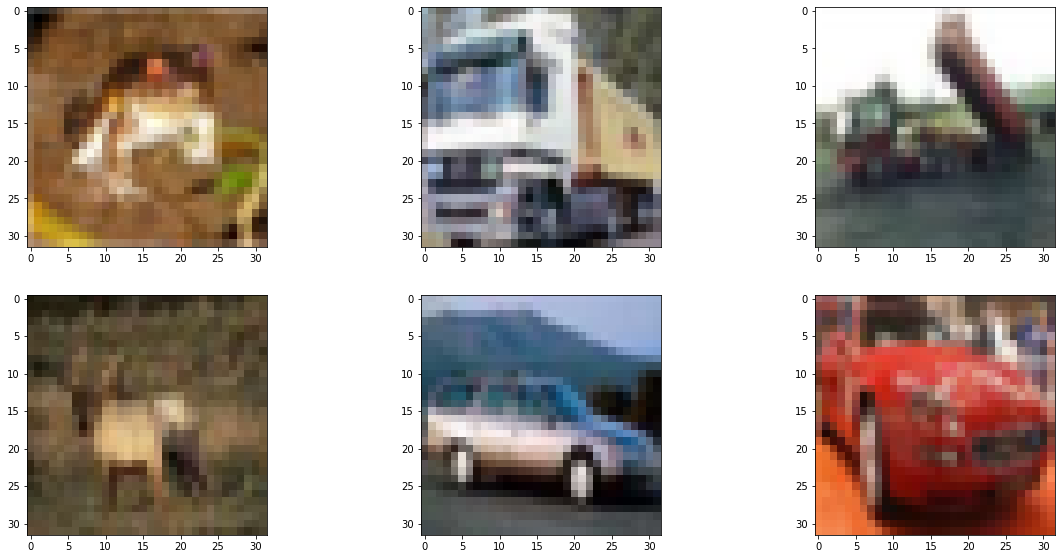

In [7]:
n=6
plt.figure(figsize=(20,15))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()

Label =  ship


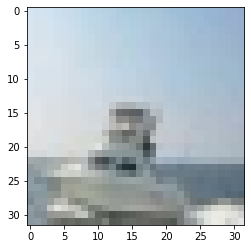

In [8]:
n = 100
print("Label =  " + ['airplane', 'automobile', 'bird', 'cat', 
                     'deer', 'dog', 'frog', 'horse', 'ship', 'truck'][y_train[n][0]])
plt.imshow(x_train[n])

In [9]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
#ne-hot encoding for target classes

y_train = np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

### Model Architecture

In [12]:
model=Sequential()
model.add(Conv2D(64,(3,3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [15]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 274s 174ms/step - loss: 1.4954 - accuracy: 0.4594 - val_loss: 1.2434 - val_accuracy: 0.5612
Epoch 2/10
1563/1563 [==============================] - 273s 174ms/step - loss: 1.1843 - accuracy: 0.5778 - val_loss: 1.0491 - val_accuracy: 0.6279
Epoch 3/10
1563/1563 [==============================] - 270s 173ms/step - loss: 1.0636 - accuracy: 0.6207 - val_loss: 0.9904 - val_accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 269s 172ms/step - loss: 0.9828 - accuracy: 0.6525 - val_loss: 0.9509 - val_accuracy: 0.6619
Epoch 5/10
1563/1563 [==============================] - 271s 173ms/step - loss: 0.9176 - accuracy: 0.6774 - val_loss: 0.9502 - val_accuracy: 0.6661
Epoch 6/10
1563/1563 [==============================] - 273s 175ms/step - loss: 0.8741 - accuracy: 0.6905 - val_loss: 0.9099 - val_accuracy: 0.6829
Epoch 7/10
1563/1563 [==============================] - 275s 176ms/step - loss: 0.8334 - accuracy: 0.7047 - val_

In [16]:
model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 7s 22ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [17]:
## Accuracy
import numpy as np
(np.array(list(map(lambda x: (np.arange(10)[x == 1][0]), y_test))) == 
   model.predict(x_test).argmax(axis = 1)).sum()/len(y_test)

313/313 [==============================] - 6s 21ms/step


0.6946

---

In [18]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [19]:
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, batch_size = 200, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
250/250 [==============================] - 181s 719ms/step - loss: 1.5274 - accuracy: 0.4505 - val_loss: 1.1802 - val_accuracy: 0.5787
Epoch 2/20
250/250 [==============================] - 182s 727ms/step - loss: 1.0311 - accuracy: 0.6359 - val_loss: 0.9067 - val_accuracy: 0.6860
Epoch 3/20
250/250 [==============================] - 180s 722ms/step - loss: 0.7994 - accuracy: 0.7232 - val_loss: 0.8255 - val_accuracy: 0.7174
Epoch 4/20
250/250 [==============================] - 181s 724ms/step - loss: 0.6659 - accuracy: 0.7686 - val_loss: 0.7258 - val_accuracy: 0.7471
Epoch 5/20
250/250 [==============================] - 181s 724ms/step - loss: 0.5522 - accuracy: 0.8073 - val_loss: 0.6993 - val_accuracy: 0.7673
Epoch 6/20
250/250 [==============================] - 179s 717ms/step - loss: 0.4529 - accuracy: 0.8432 - val_loss: 0.7254 - val_accuracy: 0.7602
Epoch 7/20
250/250 [==============================] - 179s 717ms/step - loss: 0.3731 - accuracy: 0.8694 - val_loss: 0.7708 -

In [21]:
 model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 9s 29ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [22]:
## Accuracy
import numpy as np
(np.array(list(map(lambda x: (np.arange(10)[x == 1][0]), y_test))) == 
   model.predict(x_test).argmax(axis = 1)).sum()/len(y_test)

313/313 [==============================] - 8s 27ms/step


0.7572

In [23]:
_,acc=model.evaluate(x_test,y_test)
print(acc*100)

313/313 [==============================] - 9s 27ms/step - loss: 1.5622 - accuracy: 0.7572
75.72000026702881


In [24]:
model.save("model_cifar_10epoch.h5")

In [36]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("1200.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict([im])[0].argmax(axis=0)
print(pred,results[pred])

1/1 [==============================] - 0s 16ms/step
2 bird
